In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99%|██████████████████████████████████████▋| 1.06G/1.06G [00:05<00:00, 241MB/s]
100%|███████████████████████████████████████| 1.06G/1.06G [00:05<00:00, 214MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/kaggle/working/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/kaggle/working')
zip_ref.close()

# or use this:
# !unzip -q /kaggle/working/dogs-vs-cats.zip

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping

In [94]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224, 224,3) # could be any shape
)

In [95]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_layer_11 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [96]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [102]:
print(conv_base.output_shape)

(None, 7, 7, 512)


In [128]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.build((None, 224, 224, 3)) 

In [129]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# **Using Keras data loading utility**

* Loading in Batches: Instead of loading the entire dataset into RAM, which might be impractical or impossible for large datasets

* On-the-Fly Data Preprocessing: The data is loaded, preprocessed (e.g., resized, normalized, augmented), and fed into the model in real-time during training. 

* tf.data.Dataset: allows for various performance optimizations, such as parallel data loading, prefetching, and caching, which can significantly speed up the training process

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255, # This line normalizes the image pixels to the range [0, 1]
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        '/kaggle/working/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/working/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [131]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), # WHEN FINE-TUNING, THE IT'S GOOD TO KEEP THE LR SMALL
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [132]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [133]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [134]:
history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks = [early_stopping])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 426ms/step - accuracy: 0.9289 - loss: 0.1748 - val_accuracy: 0.9488 - val_loss: 0.1523
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 271s 428ms/step - accuracy: 0.9666 - loss: 0.0929 - val_accuracy: 0.9604 - val_loss: 0.1190
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 424ms/step - accuracy: 0.9694 - loss: 0.0851 - val_accuracy: 0.9606 - val_loss: 0.1236
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 423ms/step - accuracy: 0.9736 - loss: 0.0708 - val_accuracy: 0.9624 - val_loss: 0.1182
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 424ms/step - accuracy: 0.9767 - loss: 0.0643 - val_accuracy: 0.9554 - val_loss: 0.1471
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 424ms/step - accuracy: 0.9790 - loss: 0.0577 - val_accuracy: 0.9656 - val_loss: 0.1306
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 424ms/step - accuracy: 0.9840 - loss: 0.0459 - val_accuracy: 0.9632 - val_loss: 0.1650


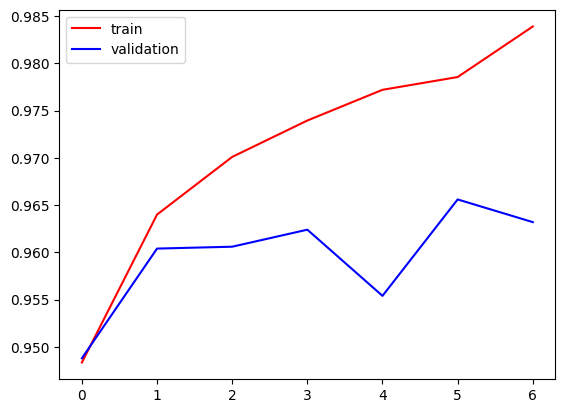

In [135]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

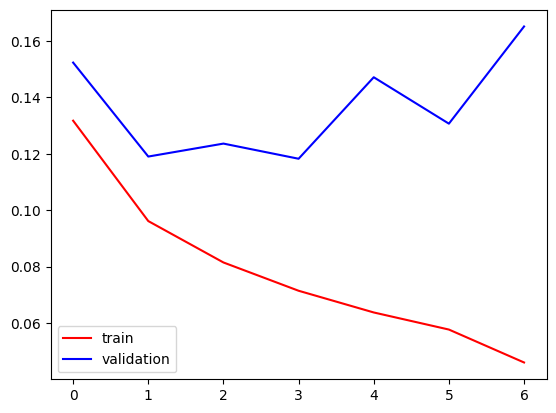

In [136]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()